# Business Problem Understanding

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('LoanData.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

## Data Understanding

- Loan_ID : Unique Loan ID

- Gender : Male/ Female

- Married : Applicant married

- Dependents : Number of dependents

- Education : Applicant Education 

- Self_Employed : whether the applicant is Self employed

- ApplicantIncome : Applicant income

- CoapplicantIncome : Coapplicant income

- LoanAmount : Loan amount in thousands

- Loan_Amount_Term : Term of loan in months

- Credit_History : credit history meets guidelines

- Property_Area : Urban/ Semi Urban/ Rural

- Loan_Status : Loan approved **target variable**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

**Dataset Exploration**

In [7]:
data['Loan_ID'].nunique()

614

**Drop unimportant columns as per feature Selection (Filter Methods)**

In [8]:
data.drop(columns=["Loan_ID"],inplace=True)

In [9]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [10]:
data['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [11]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [12]:
data["Married"].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [13]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [14]:
data['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [15]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [16]:
data['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [17]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [18]:
data['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

**Create New Columns as per requirements**

In [19]:
data['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [20]:
data['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [21]:
data["Income"] = data['ApplicantIncome'] + data['CoapplicantIncome']

data.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)

In [22]:
data["Income"].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Income, dtype: float64

In [23]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [24]:
data['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [25]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [26]:
data['Credit_History'] = data['Credit_History'].replace({1:"good",0:"bad"})

In [27]:
data['Credit_History'].unique()

array(['good', 'bad', nan], dtype=object)

In [28]:
data['Credit_History'].value_counts()

Credit_History
good    475
bad      89
Name: count, dtype: int64

In [29]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [30]:
data['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [31]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [32]:
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [33]:
continous = ['Income', 'LoanAmount']

discrete_categorical = ['Gender', 'Married', 'Education', 'Self_Employed',
                        'Credit_History', 'Property_Area', 'Loan_Status']

discrete_count = ['Dependents','Loan_Amount_Term']

#### Exploratory Data Analysis (EDA)

**for continous Variables**

In [34]:
data[continous].describe()

,Income,LoanAmount
count,614.000000,592.000000
mean,7024.705081,146.412162
std,6458.663872,85.587325
min,1442.000000,9.000000
25%,4166.000000,100.000000
50%,5416.500000,128.000000
75%,7521.750000,168.000000
max,81000.000000,700.000000


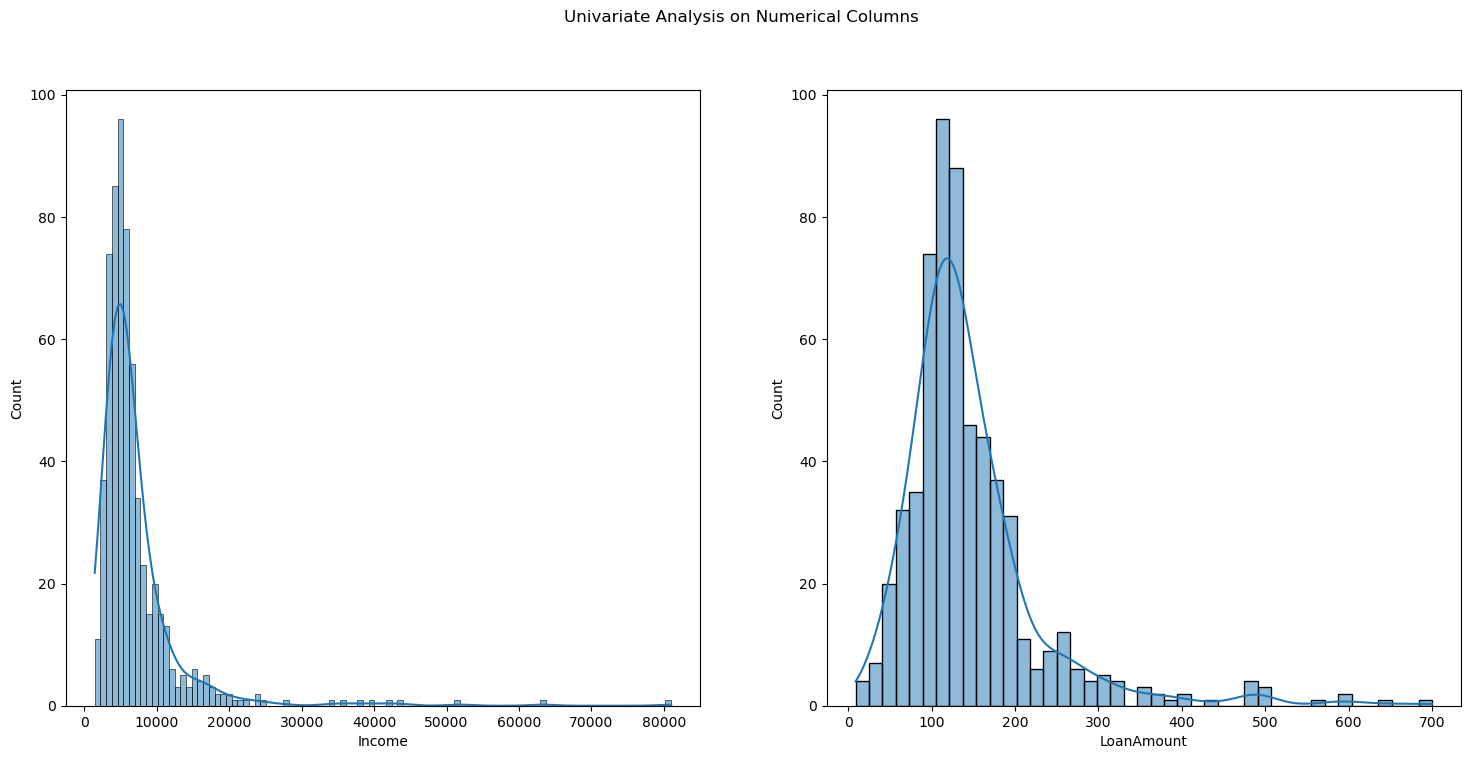

In [35]:
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(1,2, 1)
sns.histplot(data['Income'],kde=True)

plt.subplot(1,2, 2)
sns.histplot(data['LoanAmount'], kde=True)

plt.suptitle('Univariate Analysis on Numerical Columns')
plt.show()

In [36]:
data[continous].skew()

Income        5.633449
LoanAmount    2.677552
dtype: float64

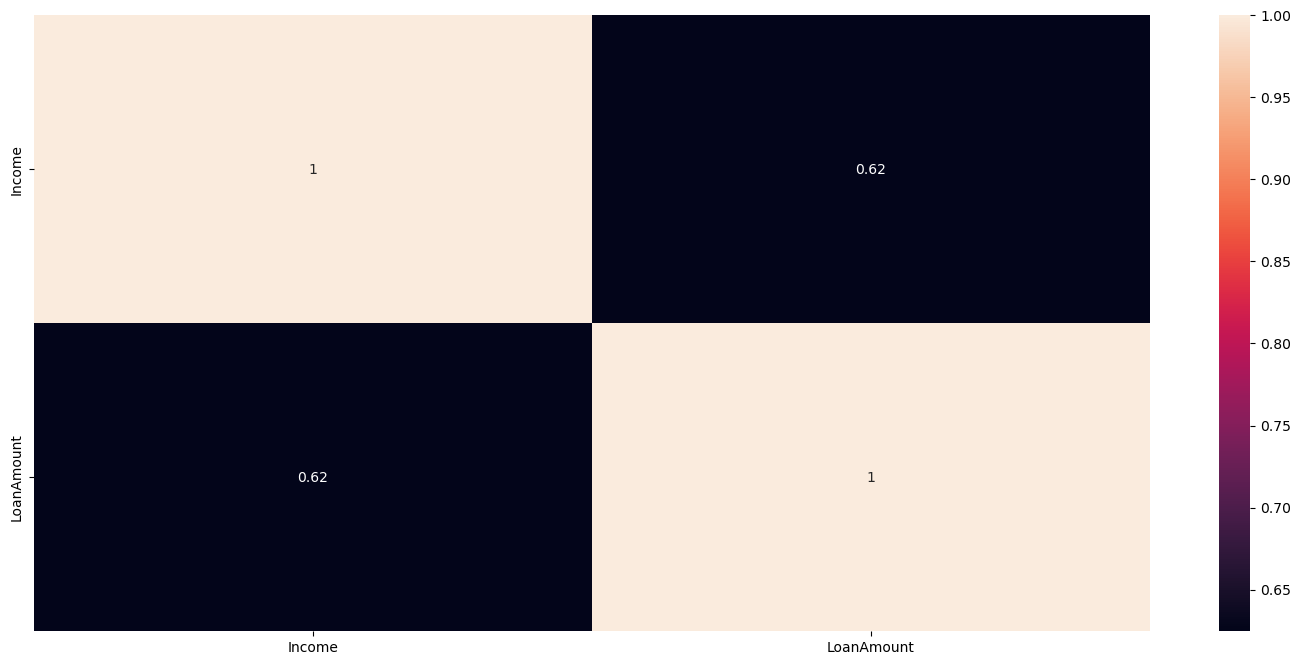

In [37]:
sns.heatmap(data[continous].corr(),annot=True)
plt.show()

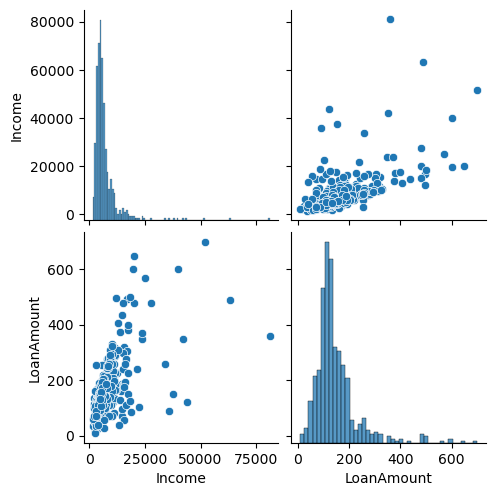

In [38]:
sns.pairplot(data[continous])
plt.show()

**for Discrete Variables**

In [39]:
data[discrete_categorical].describe()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,good,Semiurban,Y
freq,489,398,480,500,475,233,422


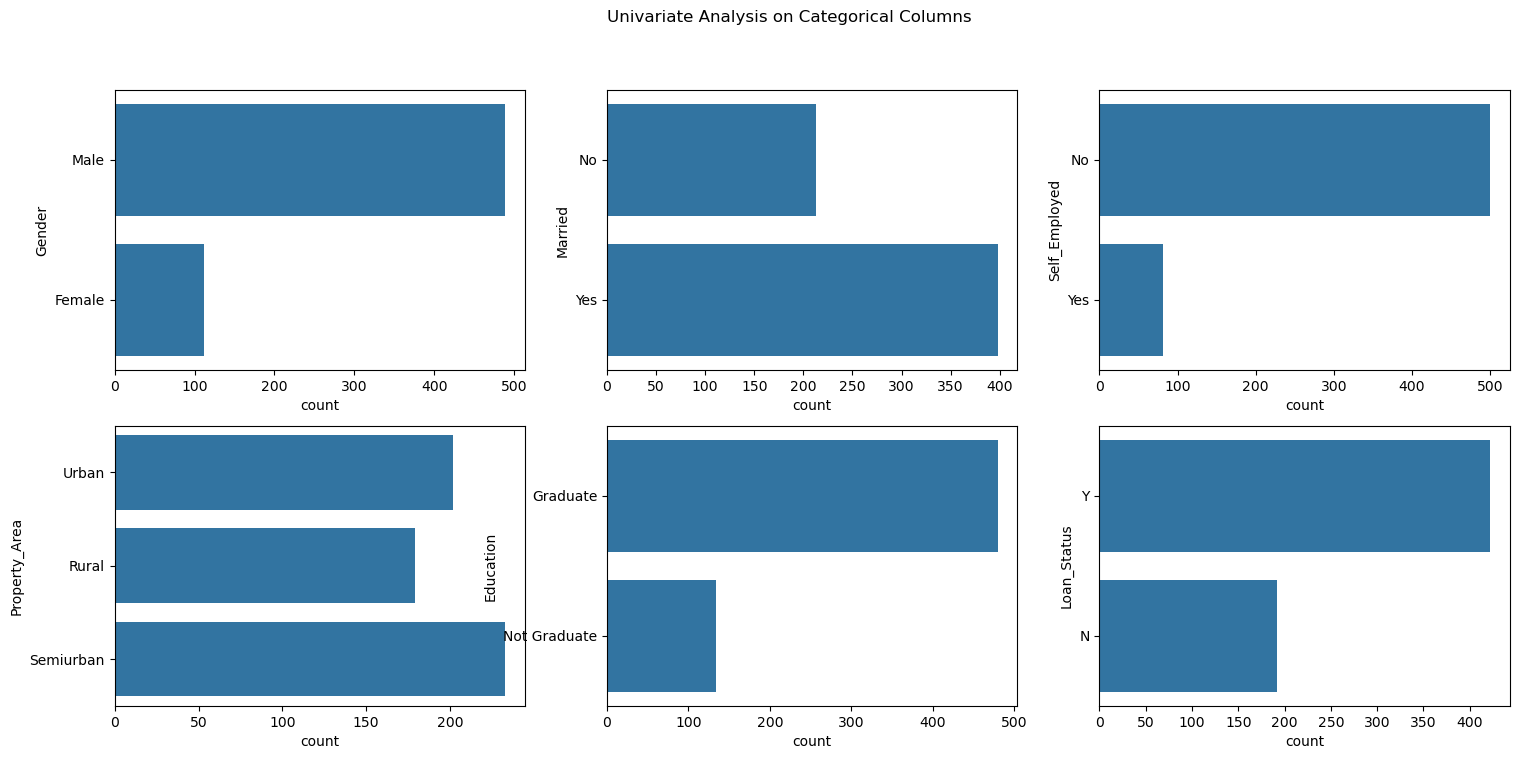

In [40]:
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(2, 3, 1)
sns.countplot(data['Gender'])

plt.subplot(2, 3, 2)
sns.countplot(data['Married'])

plt.subplot(2, 3, 3)
sns.countplot(data['Self_Employed'])

plt.subplot(2, 3, 4)
sns.countplot(data['Property_Area'])

plt.subplot(2, 3, 5)
sns.countplot(data['Education'])

plt.subplot(2, 3, 6)
sns.countplot(data['Loan_Status'])

plt.suptitle('Univariate Analysis on Categorical Columns')
plt.show()

**check for Missing Values**

In [41]:
data.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

**check for Skewness**

In [42]:
data[continous].skew()

Income        5.633449
LoanAmount    2.677552
dtype: float64

**check outliers**

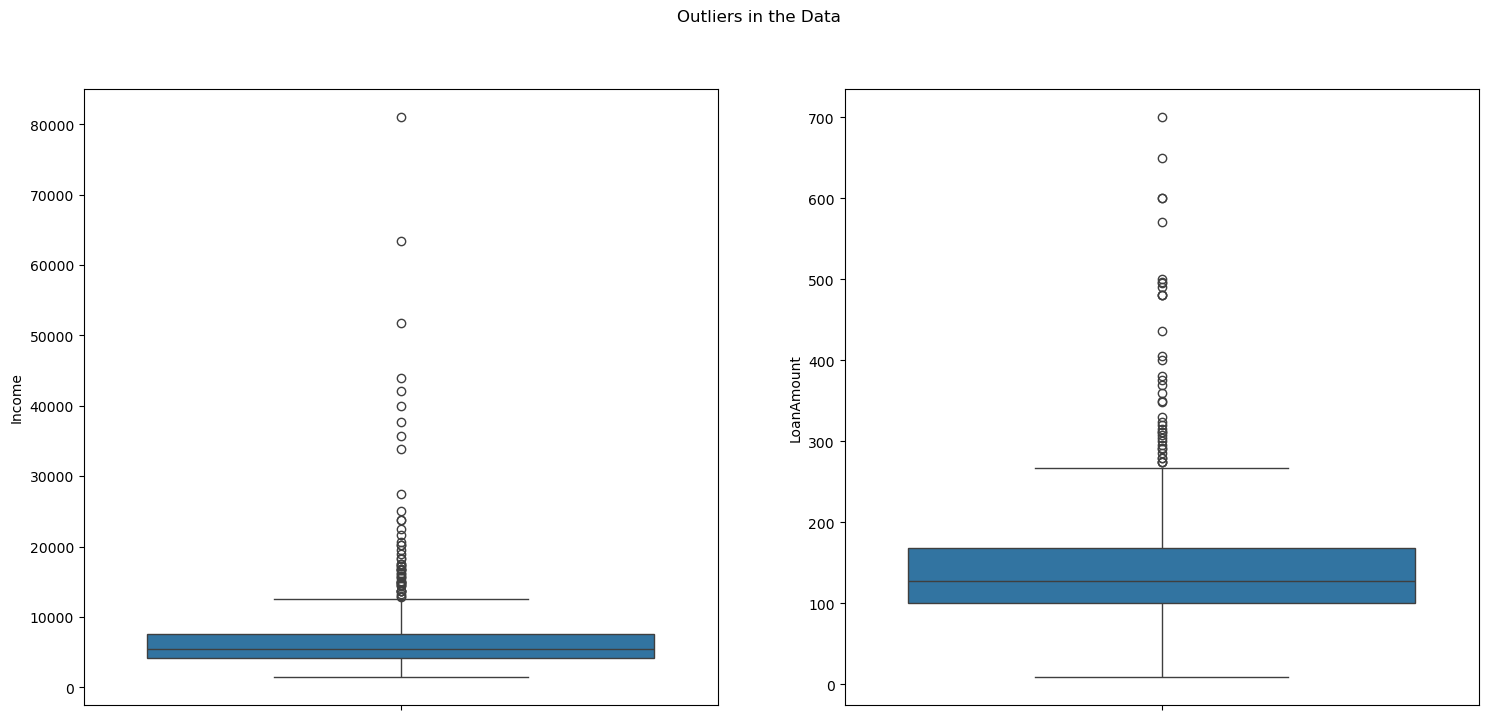

In [43]:
# lets visualize the outliers using Box Plot

plt.subplot(1, 2, 1)
sns.boxplot(data['Income'])

plt.subplot(1, 2, 2)
sns.boxplot(data['LoanAmount'])

plt.suptitle('Outliers in the Data')
plt.show()

# Stage-3: Data Preparation

1. Data Cleaning
    - Wrong data
    - Missing values
    - wrong data type
    - duplicates
    - outliers
2. Data Wrangling
    - transformation (applicable on continous)
    - scaling (applicable on continous)
    - encoding (applicable on discrete categorical)
    - **Dont apply any Data Wrangling technique on Count Variable**

**Wrong Data treatment**

In [44]:
data['Dependents']  = data['Dependents'].replace({'3+':3})

**Missing Values Treatment**

In [45]:
data['Dependents'] = data['Dependents'].fillna(0)

data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

data = data.dropna(subset=["Income",'LoanAmount','Loan_Amount_Term','Credit_History'])

**data type conversion**

In [46]:
data['Dependents']        = data['Dependents'].astype('int')
data['Loan_Amount_Term']  = data['Loan_Amount_Term'].astype('int')

**outliers treatment**

In [47]:
#outliers should be retrained (because really some people will have high income)

**transformations**

In [48]:
from scipy.stats import boxcox
data['Income'],a = boxcox(data['Income'])
data['LoanAmount'],c = boxcox(data['LoanAmount'])

In [49]:
data[continous].skew()

Income       -0.027769
LoanAmount    0.038289
dtype: float64

In [50]:
data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,Male,Yes,1,Graduate,No,6.243267,360,good,Rural,N,1.864967
2,Male,Yes,0,Graduate,Yes,5.202610,360,good,Urban,Y,1.856556
3,Male,Yes,0,Not Graduate,No,6.138816,360,good,Urban,Y,1.862802
4,Male,No,0,Graduate,No,6.401083,360,good,Urban,Y,1.864819
5,Male,Yes,2,Graduate,Yes,7.481930,360,good,Urban,Y,1.868932
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,5.313992,360,good,Rural,Y,1.856069
610,Male,Yes,3,Graduate,No,4.460305,180,good,Rural,Y,1.860675
611,Male,Yes,1,Graduate,No,7.388070,360,good,Urban,Y,1.867771
612,Male,Yes,2,Graduate,No,6.870558,360,good,Urban,Y,1.866991


In [51]:
data['Gender'] = data['Gender'].replace({'Male':1,'Female':0})
data['Married'] = data['Married'].replace({'Yes':1,'No':0})
data['Education'] = data['Education'].replace({'Graduate':1,'Not Graduate':0})
data['Self_Employed'] = data['Self_Employed'].replace({'Yes':1,'No':0})
data['Property_Area'] = data['Property_Area'].replace({'Rural':0,'Semiurban':1,'Urban':2})
data['Credit_History'] = data['Credit_History'].replace({'good':1,'bad':0})
data['Loan_Status'] = data['Loan_Status'].replace({'Y':1,'N':0})

In [52]:
data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,1,1,1,1,0,6.243267,360,1,0,0,1.864967
2,1,1,0,1,1,5.202610,360,1,2,1,1.856556
3,1,1,0,0,0,6.138816,360,1,2,1,1.862802
4,1,0,0,1,0,6.401083,360,1,2,1,1.864819
5,1,1,2,1,1,7.481930,360,1,2,1,1.868932
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,5.313992,360,1,0,1,1.856069
610,1,1,3,1,0,4.460305,180,1,0,1,1.860675
611,1,1,1,1,0,7.388070,360,1,2,1,1.867771
612,1,1,2,1,0,6.870558,360,1,2,1,1.866991


**X&y**

In [53]:
X = data.drop('Loan_Status',axis=1)
y = data['Loan_Status']

**train-test split**

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 70)

# Stage -4 : Modelling & Evaluation

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier               # KNeighborsRegressor 
from sklearn.svm import SVC                                      # SVR
from sklearn.tree import DecisionTreeClassifier                  # DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier              # RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier          # GradientBoostingRegressor 
from xgboost import XGBClassifier                                # XGBRegressor
                                
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

## 1.Logistic Regression

In [56]:
#Modelling
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

#Predict & Evaluate on train data
ypred_train = log_model.predict(X_train)                           # default thresold value is 0.5
print("Train Accuracy :",accuracy_score(y_train,ypred_train))

#Cross Validation on Train data
print("CV Score :", cross_val_score(log_model,X_train,y_train,cv=5,scoring="accuracy").mean())

#predict & Evaluation on test data
ypred_test  = log_model.predict(X_test)
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8226950354609929
CV Score : 0.8227731092436976
Test Accuracy : 0.7830188679245284


In [65]:
%%timeit

log_model.fit(X_train,y_train)

44.6 ms ± 9.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [57]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

[[17 20]
 [ 3 66]]
              precision    recall  f1-score   support

           0       0.85      0.46      0.60        37
           1       0.77      0.96      0.85        69

    accuracy                           0.78       106
   macro avg       0.81      0.71      0.72       106
weighted avg       0.80      0.78      0.76       106



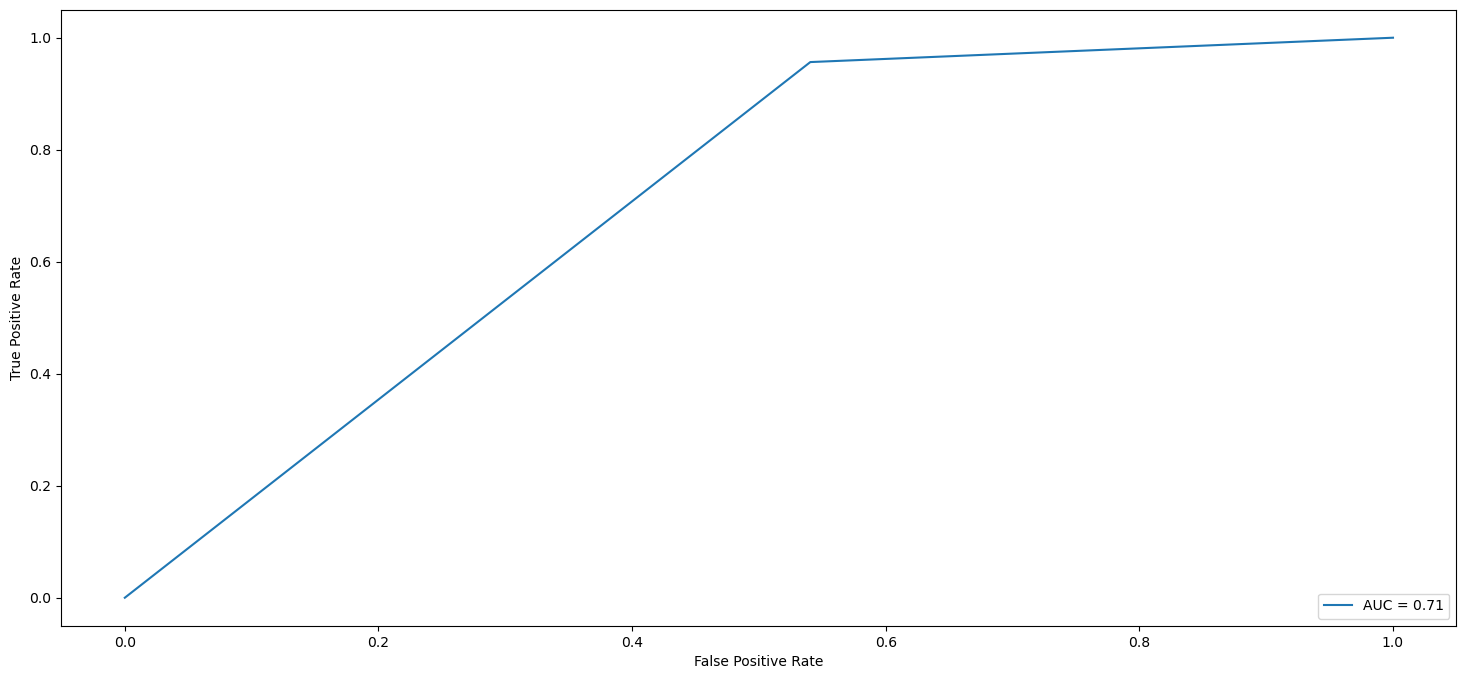

In [58]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_test,ypred_test)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

In [59]:
#AUC Score
from sklearn.metrics import roc_auc_score
print("AUC Score:",roc_auc_score(y_test,ypred_test))

AUC Score: 0.7079905992949471


**2. KNN**
- HPT
- Modelling & Evaluation

In [60]:
# Hyperparameter tuning
estimator = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1,50)),"p":[1,2]}
knn_grid = GridSearchCV(estimator, param_grid,scoring='accuracy',cv=5)
knn_grid.fit(X_train,y_train)

knn_grid.best_params_

{'n_neighbors': 13, 'p': 1}

In [63]:
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=13, p=1)

In [61]:
#Modelling
knn_model = knn_grid.best_estimator_
knn_model.fit(X_train,y_train)

#Predict & Evaluate on train data
ypred_train = knn_model.predict(X_train)
print("Train Accuracy :",accuracy_score(y_train,ypred_train))

#Cross Validation on Train data
print("CV Score :", cross_val_score(knn_model,X_train,y_train,cv=5,scoring="accuracy").mean())

#Predict & Evaluate on test data
ypred_test  = knn_model.predict(X_test)
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.7683215130023641
CV Score : 0.742296918767507
Test Accuracy : 0.6981132075471698


**3.Support Vector Machine (SVM)**
- HPT
- Modelling & Evaluation

In [62]:
#Hyperparameter tuning
from sklearn.svm import SVC
estimator = SVC()
param_grid = {'C':[0.001,0.01,0.1,1,10],'kernel':['linear','rbf','sigmoid','poly']}
svm_grid = GridSearchCV(estimator, param_grid,scoring='accuracy',cv=5)
svm_grid.fit(X_train,y_train)

#SVM with best Hyperparameters
svm_grid.best_estimator_

SVC(C=0.1, kernel='linear')

In [64]:
#Modelling
svm_model = svm_grid.best_estimator_
svm_model.fit(X_train,y_train)

#Predict & Evaluate on train data
ypred_train = svm_model.predict(X_train)
print("Train Accuracy :",accuracy_score(y_train,ypred_train))

#Cross Validation on Train data
print("CV Score :", cross_val_score(svm_model,X_train,y_train,cv=5,scoring="accuracy").mean())

#Predict & Evaluate on test data
ypred_test  = svm_model.predict(X_test)
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8226950354609929
CV Score : 0.8227731092436976
Test Accuracy : 0.7830188679245284


In [66]:
%%timeit

svm_model.fit(X_train,y_train)

1.11 s ± 51 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**4.Decision Tree Classifier**
- HPT
- Identify important features by using feature seclection (ensemble method)
- Modelling & Evaluation

**first create default DT model (fully grown tree without any pruning)** so that, we can understand the max_depth

In [67]:
model = DecisionTreeClassifier(random_state=True)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=True)

In [75]:
y_train.value_counts()

Loan_Status
1    297
0    126
Name: count, dtype: int64

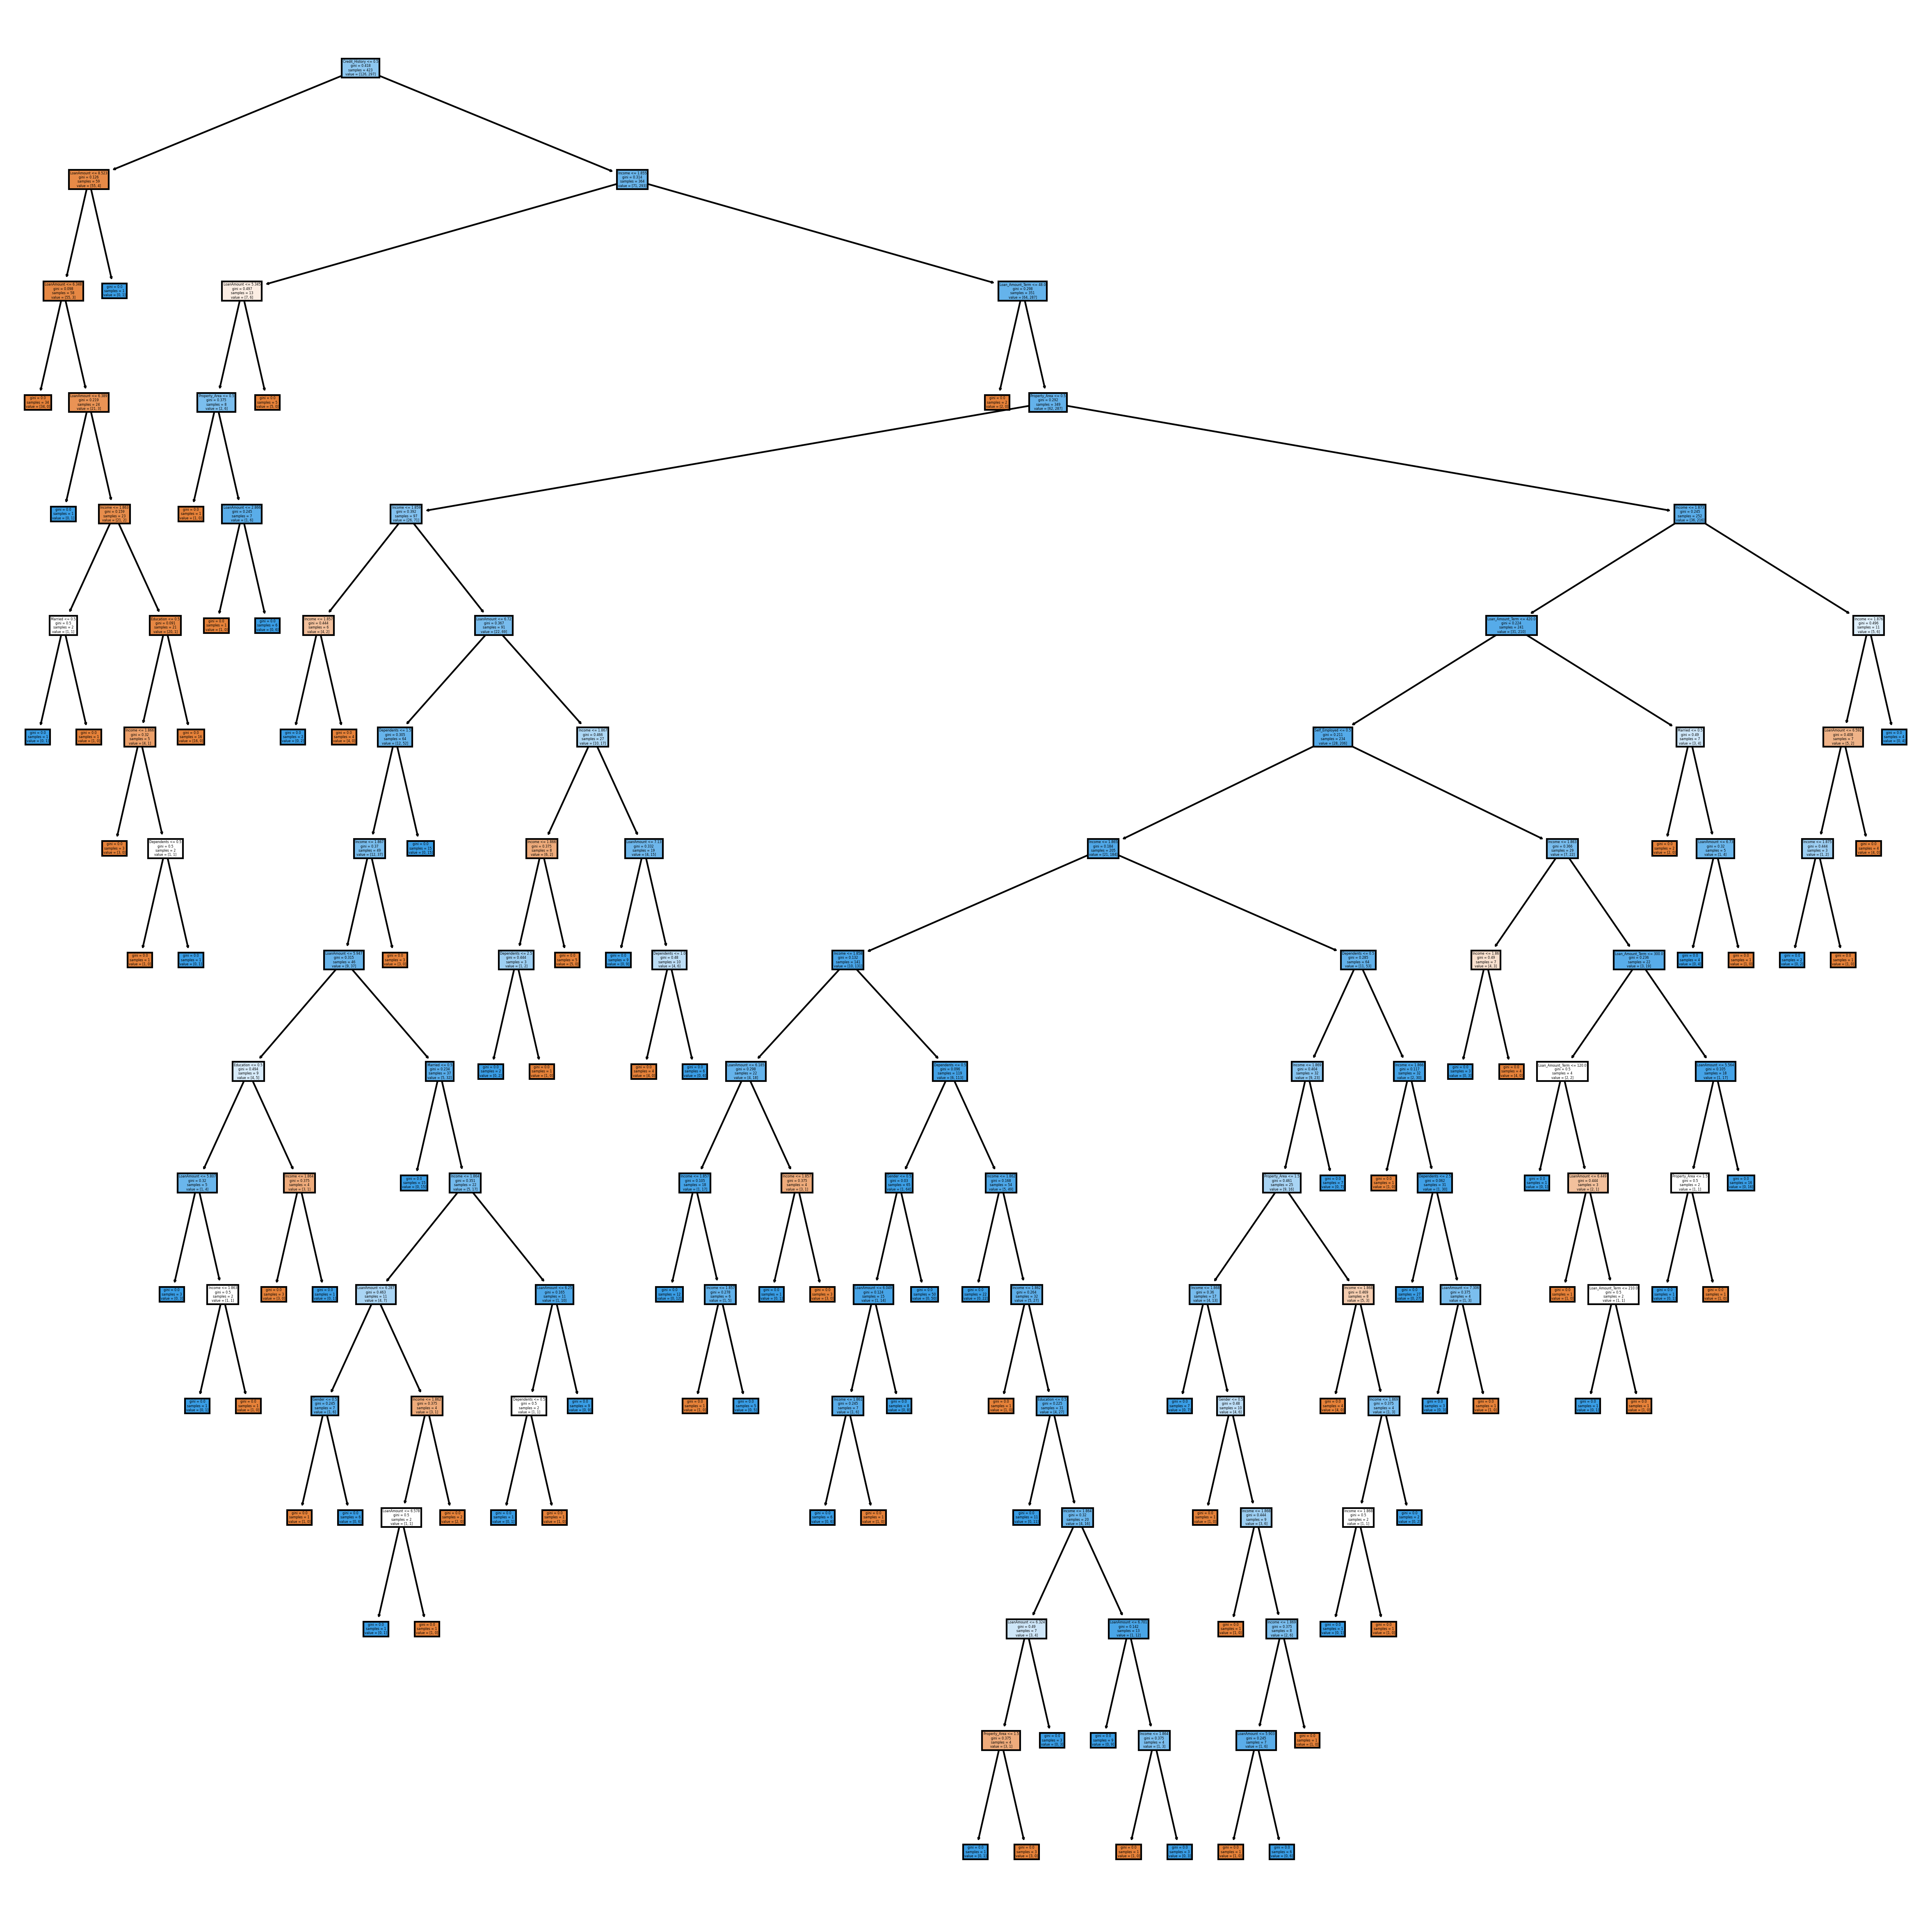

In [78]:
plt.figure(figsize=(20,20),dpi=300)

plot_tree(model,filled=True, feature_names=X_train.columns.tolist())
plt.show()

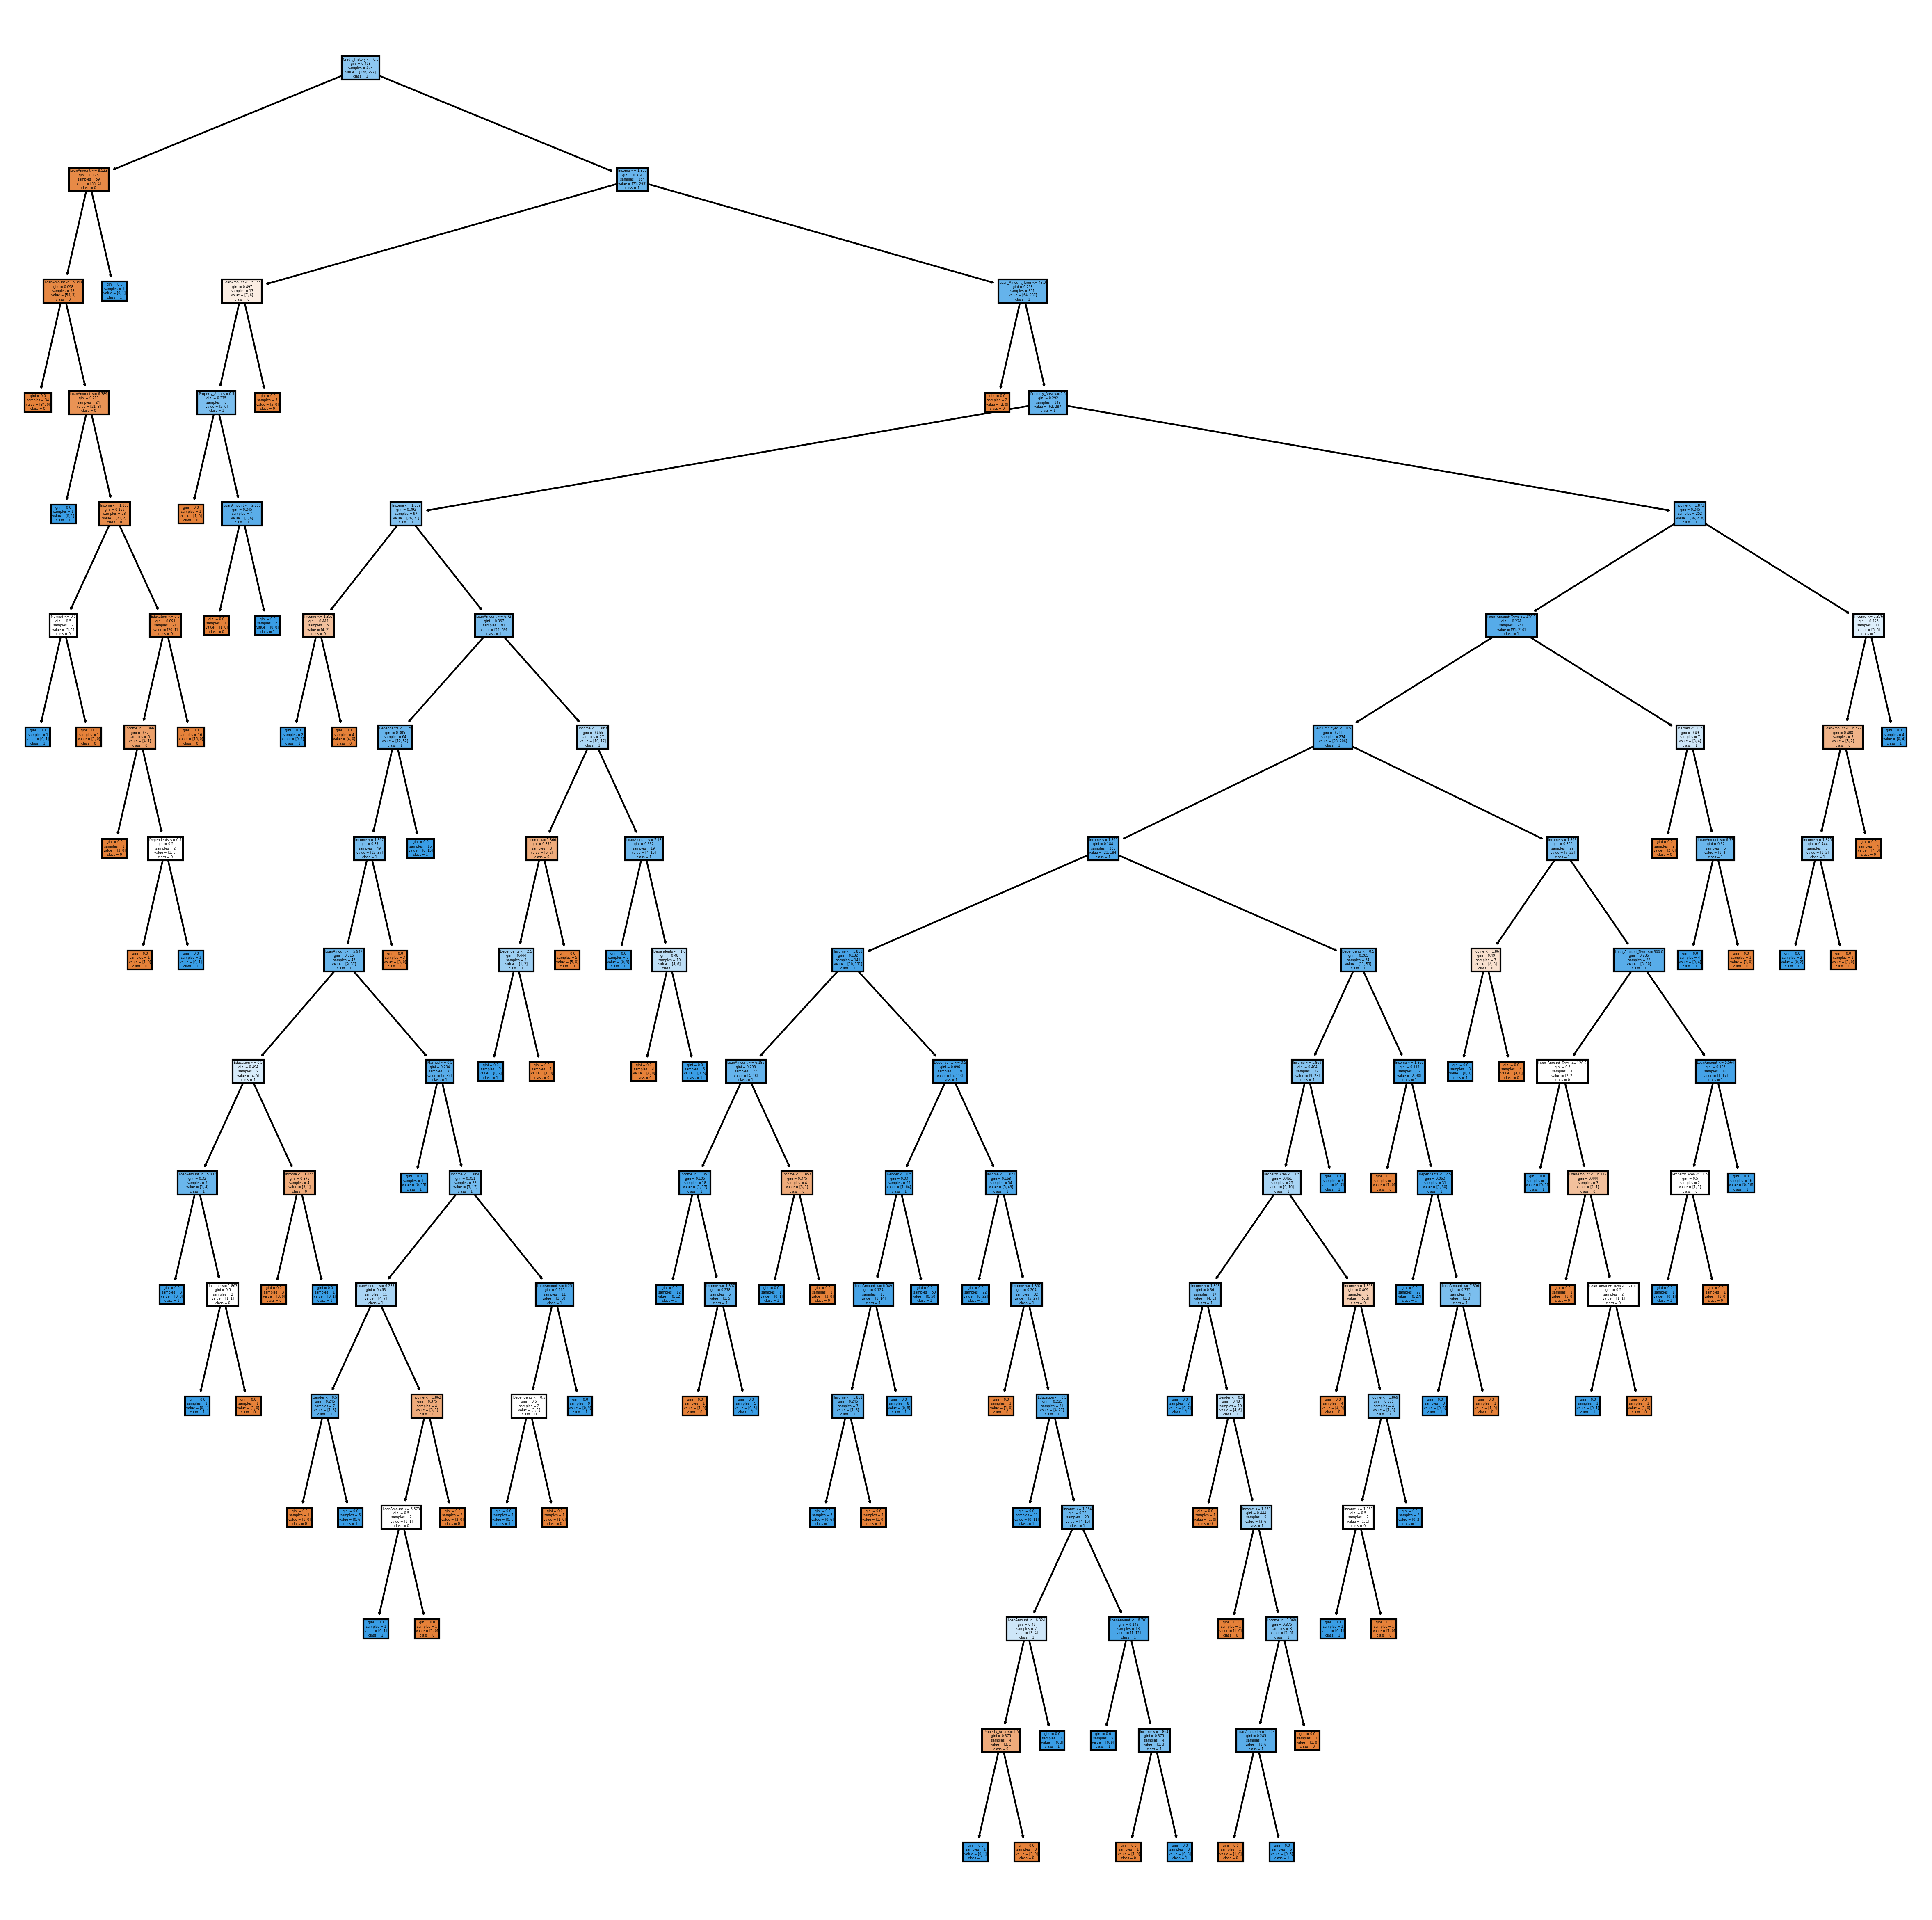

In [68]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20),dpi=300)
plot_tree(model,filled=True,
          feature_names=X_train.columns.tolist(),
          class_names=["0","1"])
plt.show()

In [79]:
#Hyper parameter tuning
estimator = DecisionTreeClassifier(random_state=True)

param_grid = {"criterion":["gini", "entropy"],
              "max_depth":list(range(1,16))}

dt_grid = GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5)
dt_grid.fit(X_train,y_train)

dt = dt_grid.best_estimator_
dt

DecisionTreeClassifier(max_depth=1, random_state=True)

In [84]:
#Important features
feats_dt = pd.DataFrame(data=dt.feature_importances_,
                     index=X.columns,
                     columns=['Importance'])

important_features_dt = feats_dt[feats_dt["Importance"]>0].index.tolist()
important_features_dt

['Credit_History']

**Creating Decison Tree Model with important parameters and important features**

In [85]:
#Selecting train & test data
X_train_dt = X_train[important_features_dt]
X_test_dt  = X_test[important_features_dt]

#Modelling
dt = dt_grid.best_estimator_
dt.fit(X_train_dt,y_train)

#Evaluation
ypred_train = dt.predict(X_train_dt)
ypred_test  = dt.predict(X_test_dt)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("CV Score :", cross_val_score(dt,X_train_dt,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8226950354609929
CV Score : 0.8227731092436976
Test Accuracy : 0.7830188679245284


In [87]:
%%timeit

dt.fit(X_train_dt,y_train)

1.8 ms ± 78 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**5.Random Forest Classifier**

- HPT

- identify important features

- Modelling

- Evaluation

In [88]:
#Hyper parameter tuning
estimator = RandomForestClassifier(random_state=True)

param_grid = {'n_estimators':list(range(1,101))} 

rf_grid = GridSearchCV(estimator,param_grid, scoring="accuracy",cv=5)
rf_grid.fit(X_train,y_train)

rf= rf_grid.best_estimator_
rf

RandomForestClassifier(n_estimators=21, random_state=True)

In [89]:
#Important features
feats_ab = pd.DataFrame(data=rf.feature_importances_,
                        index=X.columns,
                        columns=['Importance'])

important_features_rf = feats_ab[feats_ab["Importance"]>0].index.tolist()
important_features_rf

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [90]:
#use important features
X_train_rf = X_train[important_features_rf]    
X_test_rf = X_test[important_features_rf]

#Modelling
rf= rf_grid.best_estimator_
rf.fit(X_train_rf,y_train)

#Evaluation
ypred_train = rf.predict(X_train_rf)
ypred_test  = rf.predict(X_test_rf)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("CV score :", cross_val_score(rf, X_train_rf, y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.9952718676122931
CV score : 0.8203641456582634
Test Accuracy : 0.7735849056603774


**6. AdaBoost Classifier**

In [91]:
estimator = AdaBoostClassifier(random_state=True)
param_grid = {'n_estimators':list(range(1,51))} 

ab_grid = GridSearchCV(estimator,param_grid, scoring="accuracy",cv=5)
ab_grid.fit(X_train,y_train)

ab = ab_grid.best_estimator_
ab

AdaBoostClassifier(n_estimators=3, random_state=True)

In [92]:
#Important features
feats_ab = pd.DataFrame(data=ab.feature_importances_,
                     index=X.columns,
                     columns=['Importance'])

important_features_ab = feats_ab[feats_ab["Importance"]>0].index.tolist()
important_features_ab

['Credit_History', 'Property_Area', 'Income']

In [93]:
X_train_ab = X_train[important_features_ab]    
X_test_ab = X_test[important_features_ab]

#Modelling
ab = ab_grid.best_estimator_
ab.fit(X_train_ab,y_train)

#Evaluation
ypred_train = ab.predict(X_train_ab)
ypred_test  = ab.predict(X_test_ab)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("CV Score :", cross_val_score(ab,X_train_ab,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.83451536643026
CV Score : 0.8298879551820729
Test Accuracy : 0.7641509433962265


**7. Gradient Boost Classifier**

In [94]:
estimator = GradientBoostingClassifier(random_state=True)
param_grid = {"n_estimators": list(range(1,10)),
              "learning_rate":[0.1,0.2,0.3,0.4,0.5,0.7,0.8,0.9,1.0]}

gb_grid = GridSearchCV(estimator,param_grid, scoring="accuracy",cv=5)
gb_grid.fit(X_train,y_train)

gb = gb_grid.best_estimator_
gb

GradientBoostingClassifier(learning_rate=0.2, n_estimators=6, random_state=True)

In [95]:
#Important features
feats_gb = pd.DataFrame(data=gb.feature_importances_,
                     index=X.columns,
                     columns=['Importance'])

important_features_gb = feats_gb[feats_gb["Importance"]>0].index.tolist()
important_features_gb

['Married',
 'Education',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [96]:
X_train_gb = X_train[important_features_gb]
X_test_gb = X_test[important_features_gb]

gb = gb_grid.best_estimator_
gb.fit(X_train_gb,y_train)

ypred_train = gb.predict(X_train_gb)
ypred_test  = gb.predict(X_test_gb)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("CV Score :", cross_val_score(gb,X_train_gb,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8392434988179669
CV Score : 0.8203921568627452
Test Accuracy : 0.7735849056603774


**8. XGBoost Classifier**

In [97]:
#Hyperparameter tuning
estimator = XGBClassifier()

param_grid = {"n_estimators":[10,20,40,100],
              'max_depth':[3,4,5],
              'gamma':[0,0.15,0.3,0.5,1]}

xgb_grid = GridSearchCV(estimator,param_grid, scoring="accuracy",cv=5)
xgb_grid.fit(X_train,y_train)

xgb = xgb_grid.best_estimator_
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [98]:
#Important features
feats_xgb = pd.DataFrame(data=xgb.feature_importances_,
                     index=X.columns,
                     columns=['Importance'])

important_features_xgb = feats_xgb[feats_xgb["Importance"]>0].index.tolist()
important_features_xgb

['Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [99]:
X_train_xgb = X_train[important_features_xgb]
X_test_xgb = X_test[important_features_xgb]

#Modelling
xgb = xgb_grid.best_estimator_
xgb.fit(X_train_xgb,y_train)

#Evaluation

ypred_train = xgb.predict(X_train_xgb)
ypred_test  = xgb.predict(X_test_xgb)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("CV Score :", cross_val_score(xgb,X_train_xgb,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8557919621749409
CV Score : 0.8275070028011206
Test Accuracy : 0.7735849056603774


# Save the best Model

In [100]:
from joblib import dump

dump(dt,'loan.joblib') 

['loan.joblib']

# Predict on New data

In [106]:
input_data ={"Loan_ID":"LP002991",
             "Gender":"Male",
             "Married":"No",
             "Dependents":1,
             "Education":"Graduate",
             "Self_Employed":"yes",
             "ApplicantIncome":1000,
            "CoapplicantIncome":0,

             "LoanAmount":100,
            "Loan_Amount_Term":240,
            "Credit_History":"good",
            "Property_Area":"Urban"}

In [107]:
data = pd.DataFrame(input_data,index=[0])
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP002991,Male,No,1,Graduate,yes,1000,0,100,240,good,Urban


**Apply Data preprocessing on Unknown Data**

In [108]:
data.drop(columns=["Loan_ID"],inplace=True)
data["Income"] = data['ApplicantIncome'] + data['CoapplicantIncome']
data.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)

data['Dependents'] = data['Dependents'].fillna(0)
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data = data.dropna(subset=["Income",'LoanAmount','Loan_Amount_Term','Credit_History'])
data['Dependents']        = data['Dependents'].astype('int')
data['Loan_Amount_Term']  = data['Loan_Amount_Term'].astype('int')

data['Gender'] = data['Gender'].replace({'Male':1,'Female':0})
data['Married'] = data['Married'].replace({'Yes':1,'No':0})
data['Education'] = data['Education'].replace({'Graduate':1,'Not Graduate':0})
data['Self_Employed'] = data['Self_Employed'].replace({'yes':1,'No':0})
data['Property_Area'] = data['Property_Area'].replace({'Rural':0,'Semiurban':1,'Urban':2})
data['Credit_History'] = data['Credit_History'].replace({'good':1,'bad':0})
data['Loan_Amount_Term']  = data['Loan_Amount_Term']/12

X_new = data 

In [109]:
X_new 

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
0,1,0,1,1,1,100,20.0,1,2,1000


In [110]:
# Select Important features of your best model
X_new = X_new[important_features_dt]

# Apply & Predict using your best model
dt.predict(X_new)

array([1], dtype=int64)